# Regression

Ref: https://youtu.be/I_on5dTY3d4<br>
https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/4-regressor_example.py


In [12]:
import numpy as np
np.random.seed(1337)    # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt
%matplotlib inline

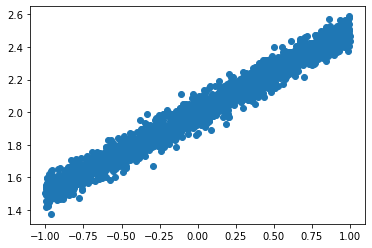

In [13]:
# create some data
X = np.linspace(-1, 1, 2000)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.05, (2000, ))

# plot data
plt.scatter(X, Y)
plt.show()

In [14]:
# prepare data for model training and testing
X_train, Y_train = X[:1600], Y[:1600]     # first 160 data points
X_test, Y_test = X[1600:], Y[1600:]       # last 40 data points

In [15]:
# build model
model = Sequential()
model.add(Dense(units=1, input_dim=1))

# choose loss function and optmizer
model.compile(loss="mse", optimizer="sgd")

In [16]:
# train model
print("Training ---------------------")
for i in range(3001):
    cost = model.train_on_batch(X_train, Y_train)
    if i%100==0: 
        print("train cost: ", cost)

Training ---------------------
train cost:  4.198634147644043
train cost:  0.12439202517271042
train cost:  0.017116287723183632
train cost:  0.005976415704935789
train cost:  0.0033766799606382847
train cost:  0.0027064946480095387
train cost:  0.0025324823800474405
train cost:  0.0024872799403965473
train cost:  0.002475535497069359
train cost:  0.002472484949976206
train cost:  0.0024716928601264954
train cost:  0.0024714870378375053
train cost:  0.002471433486789465
train cost:  0.0024714195169508457
train cost:  0.0024714162573218346
train cost:  0.00247141532599926
train cost:  0.0024714150931686163
train cost:  0.0024714148603379726
train cost:  0.0024714148603379726
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:  0.002471414627507329
train cost:

In [17]:
# test model
print("Testing ---------------------")
cost = model.evaluate(X_test, Y_test, batch_size=400)
print("test cost: ", cost)
W, b = model.layers[0].get_weights()
print("Weights = W", W, " bias = ", b)


Testing ---------------------
1/1 [==============================] - 0s 1ms/step - loss: 0.0024
test cost:  0.00236445851624012
Weights = W [[0.49831375]]  bias =  [2.0003827]


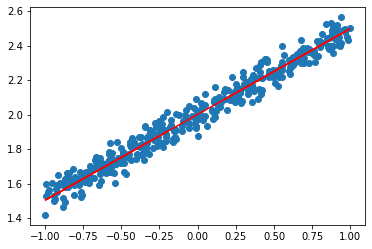

In [21]:
# predict
Y_pred = model.predict(X_test)
# print(Y_pred)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color="red")
plt.show()